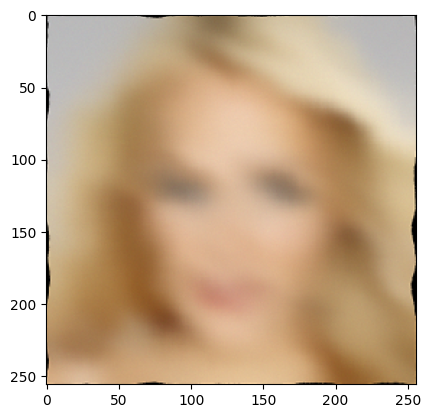

In [14]:
import imgaug.augmenters as iaa
from basicsr.data import degradations as degradations
import math
import cv2
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt

class Turb_Mei():
    def __init__(self,params):
        super().__init__()
        self.params=params
        self.deformation = iaa.ElasticTransformation(alpha=params["alpha"], sigma=params["sigma"]) 

    def simulate(self,img):
        img_lq = np.array(img)/255.0
        kernel = degradations.random_mixed_kernels(
                                ['iso', 'aniso'],
                                self.params["kernel_param_prob"],
                                self.params["blur_kernel_size"] * 2 + 1,
                                self.params["kernel_sigma_x_range"],
                                self.params["kernel_sigma_y_range"],
                                [-math.pi, math.pi],
                                noise_range=None)
        img_lq_blur= cv2.filter2D(img_lq, -1, kernel)
        img_lq_gd = self.deformation(image=img_lq_blur)

        # noise
        img_lq = degradations.random_add_gaussian_noise(img_lq_gd, self.params["gaussian_noise"])

        # round and clip
        img_lq=np.clip(img_lq,0,1)
        
        return img_lq


img= Image.open(os.path.join('./test.png'))
params={
    "alpha": 50,
    "sigma": [10.,20.],
    "gaussian_noise": [0,10],
    "input_size": 256,
    "blur_kernel_size": int(np.random.uniform(25, 45)),
    "kernel_sigma_x_range":[5, 25],
    "kernel_sigma_y_range":[5, 25],
    "kernel_param_prob":[0.5,0.5]
    
}
img=img.resize((params["input_size"],params["input_size"]))
Mei_sim=Turb_Mei(params)
img_mei =Mei_sim.simulate(img)
plt.imshow(img_mei)

